In [156]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [157]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")
df1 = pd.read_csv('C:/1차data/고객속성_6기.csv', encoding="cp949",index_col=0)
df1

,고객번호,증감확인,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유
0,1,감소,M,60세이상,0,15,0
1,2,감소,M,60세이상,0,8,0
2,3,증가,M,60세이상,0,0,0
3,4,증가,F,60세이상,0,3,0
4,6,증가,F,60세이상,0,0,0
...,...,...,...,...,...,...,...
18873,19333,감소,F,20대,5,0,1
18874,19334,감소,M,30대,0,30,1
18875,19335,증가,F,30대,0,0,1
18876,19336,증가,F,30대,0,0,0


In [158]:
from sklearn.preprocessing import LabelEncoder
lst=['연령대','성별','증감확인']
scaler = LabelEncoder()
for i in lst:
    df1[f'{i}']=scaler.fit_transform(df1[f'{i}'])
df1

,고객번호,증감확인,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유
0,1,0,1,5,0,15,0
1,2,0,1,5,0,8,0
2,3,1,1,5,0,0,0
3,4,1,0,5,0,3,0
4,6,1,0,5,0,0,0
...,...,...,...,...,...,...,...
18873,19333,0,0,1,5,0,1
18874,19334,0,1,2,0,30,1
18875,19335,1,0,2,0,0,1
18876,19336,1,0,2,0,0,0


In [159]:
df2 = pd.read_csv('C:/1차data/1-6품목변동계수.csv', encoding="cp949")
df2

,고객번호,가구류cv,고급식료품cv,기타cv,기호품cv,도서음반cv,레저취미cv,문구류cv,사치품cv,생활잡화cv,식료품cv,의류잡화cv,전자제품cv,차량용품cv,화장품cv
0,1,0.510323,0.647307,1.891668,1.048296,0.000000,0.628025,0.000000,0.830042,0.721307,3.091508,7.840260,0.426759,0.000000,1.634509
1,2,0.581314,0.408248,0.783013,0.998384,0.000000,1.839522,0.000000,0.518822,0.866263,3.463955,1.599492,0.918172,0.000000,2.301720
2,3,0.000000,0.000000,0.000000,4.078545,0.000000,0.000000,0.000000,0.000000,1.519680,1.930515,0.408248,0.408248,0.000000,0.000000
3,4,0.570298,0.571152,1.442732,1.413245,0.000000,0.554335,0.000000,0.000000,2.839113,2.625885,1.444159,0.000000,0.000000,1.030057
4,6,0.497098,0.600694,3.926354,0.791152,0.000000,0.408250,0.000000,0.878562,2.089644,3.142660,1.941744,0.000000,0.000000,3.405015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,0.000000,0.722968,1.588755,1.435982,0.000000,0.408249,0.645286,0.000000,0.804203,2.251272,0.408248,0.000000,0.000000,0.000000
18874,19334,0.510699,0.860804,1.059436,0.942556,0.894208,0.930347,1.032158,0.000000,1.971080,1.698736,1.473782,0.408248,0.408250,0.998212
18875,19335,1.331868,0.625329,0.753688,1.750100,0.993583,0.581362,2.685452,0.000000,1.543799,3.119982,2.046077,0.000000,0.595156,1.341271
18876,19336,0.408248,0.000000,1.672500,0.539557,0.000000,0.000000,0.000000,0.636210,0.639309,0.790920,1.826369,0.000000,0.000000,1.025006


In [160]:
df3 = pd.read_csv('C:/1차data/CV_대분류_6기_수정.csv', encoding="cp949",index_col=0)
df3

,고객번호,편의품CV_S,선매품CV_S,전문품CV_S,기타CV_S
0,1,0.320950,0.436627,1.204759,0.528634
1,2,0.379846,0.418128,1.927443,1.277118
2,3,0.392465,1.779187,0.000000,0.000000
3,4,0.293417,0.587273,0.000000,0.693130
4,6,0.314736,0.281094,1.138223,0.254689
...,...,...,...,...,...
18873,19333,0.422108,1.261346,0.000000,0.629424
18874,19334,0.545493,1.228038,0.000000,0.943899
18875,19335,0.298762,0.562939,0.000000,1.326809
18876,19336,1.337884,0.531065,1.571808,0.597907


In [161]:
df4 = pd.read_csv('C:/1차data/재경합침(수정).csv', encoding="cp949")
df4

,고객번호,매출변동지수,매출증감지수,객단가변동지수,객단가증감지수
0,1,1,1,4,0
1,2,3,1,6,0
2,3,0,0,0,0
3,4,9,-1,4,0
4,6,1,-1,4,-2
...,...,...,...,...,...
18873,19333,2,0,6,-2
18874,19334,11,1,5,1
18875,19335,9,-5,3,-1
18876,19336,8,-6,5,-1


In [162]:
df5 = pd.read_csv('C:/1차data/RFM테이블(수정).csv', encoding="cp949")
df5

,고객번호,최근날짜,구매빈도,구매금액
0,1,5,906,84707559
1,2,8,871,101971040
2,3,3,959,3242120
3,4,2,705,17053526
4,6,2,1146,24883761
...,...,...,...,...
18873,19333,2,691,4828442
18874,19334,9,1884,12511693
18875,19335,3,1434,17070619
18876,19336,7,338,30742885


In [163]:
df6 = pd.read_csv('C:/1차data/제휴사품목비율 (1).csv', encoding="cp949")
df6

,고객번호,A제휴사(%),B제휴사(%),C제휴사(%),D제휴사(%),편의품(%),선매품(%),전문품(%),기타(%)
0,1,83.12,9.31,7.57,0.00,2.85,28.36,66.24,2.55
1,2,78.09,11.23,0.00,10.68,3.82,34.92,53.21,8.05
2,3,92.67,4.42,2.91,0.00,4.34,95.66,0.00,0.00
3,4,62.36,24.07,13.57,0.00,7.92,78.24,0.00,13.84
4,6,68.42,10.81,20.77,0.00,4.89,50.14,36.60,8.37
...,...,...,...,...,...,...,...,...,...
18873,19333,27.06,15.21,6.99,50.75,16.20,55.29,0.00,28.51
18874,19334,0.00,71.19,28.81,0.00,18.43,56.05,0.00,25.52
18875,19335,90.31,6.76,2.93,0.00,15.84,51.27,0.00,32.89
18876,19336,86.71,0.00,0.00,13.29,9.88,30.05,55.65,4.42


In [164]:
df=pd.merge(df1,df2, on='고객번호',how='left')
df=pd.merge(df,df3, on='고객번호',how='left')
df=pd.merge(df,df4, on='고객번호',how='left')
df=pd.merge(df,df5, on='고객번호',how='left')
df=pd.merge(df,df6, on='고객번호',how='left')
df.columns

Index(['고객번호', '증감확인', '성별', '연령대', '이용횟수', '경쟁사이용횟수', '멤버쉽보유', '가구류cv',
       '고급식료품cv', '기타cv', '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '사치품cv',
       '생활잡화cv', '식료품cv', '의류잡화cv', '전자제품cv', '차량용품cv', '화장품cv', '편의품CV_S',
       '선매품CV_S', '전문품CV_S', '기타CV_S', '매출변동지수', '매출증감지수', '객단가변동지수',
       '객단가증감지수', '최근날짜', '구매빈도', '구매금액', 'A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)',
       'D제휴사(%)', '편의품(%)', '선매품(%)', '전문품(%)', '기타(%)'],
      dtype='object')

In [165]:
from sklearn.preprocessing import StandardScaler
print(df.columns)
stcol=['성별', '연령대', '이용횟수', '경쟁사이용횟수', '멤버쉽보유', '가구류cv',
       '고급식료품cv', '기타cv', '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '사치품cv',
       '생활잡화cv', '식료품cv', '의류잡화cv', '전자제품cv', '차량용품cv', '화장품cv', '편의품CV_S',
       '선매품CV_S', '전문품CV_S', '기타CV_S', '매출변동지수', '매출증감지수', '객단가변동지수',
       '객단가증감지수', '최근날짜', '구매빈도', '구매금액','A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)',
       'D제휴사(%)', '편의품(%)', '선매품(%)', '전문품(%)', '기타(%)']

for i in stcol:
    sc = StandardScaler()
    sc.fit(df[[i]])
    df[i] = sc.transform(df[[i]])
df

Index(['고객번호', '증감확인', '성별', '연령대', '이용횟수', '경쟁사이용횟수', '멤버쉽보유', '가구류cv',
       '고급식료품cv', '기타cv', '기호품cv', '도서음반cv', '레저취미cv', '문구류cv', '사치품cv',
       '생활잡화cv', '식료품cv', '의류잡화cv', '전자제품cv', '차량용품cv', '화장품cv', '편의품CV_S',
       '선매품CV_S', '전문품CV_S', '기타CV_S', '매출변동지수', '매출증감지수', '객단가변동지수',
       '객단가증감지수', '최근날짜', '구매빈도', '구매금액', 'A제휴사(%)', 'B제휴사(%)', 'C제휴사(%)',
       'D제휴사(%)', '편의품(%)', '선매품(%)', '전문품(%)', '기타(%)'],
      dtype='object')


,고객번호,증감확인,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유,가구류cv,고급식료품cv,기타cv,...,구매빈도,구매금액,A제휴사(%),B제휴사(%),C제휴사(%),D제휴사(%),편의품(%),선매품(%),전문품(%),기타(%)
0,1,0,2.154912,1.998566,-0.423501,3.785326,-0.703766,0.002439,0.469652,0.752818,...,-0.358051,0.751249,0.390612,-0.420830,-0.004591,-0.285059,-0.637370,-0.815035,1.182401,-0.830928
1,2,0,2.154912,1.998566,-0.423501,1.829441,-0.703766,0.188818,-0.063812,-0.454994,...,-0.416684,1.016416,0.167687,-0.303073,-0.704472,1.315183,-0.521035,-0.557374,0.792623,-0.491442
2,3,1,2.154912,1.998566,-0.423501,-0.405857,-0.703766,-1.337367,-0.974824,-1.308038,...,-0.269264,-0.500063,0.813860,-0.720745,-0.435429,-0.285059,-0.458670,1.828343,-0.799093,-0.988326
3,4,1,-0.464056,1.998566,-0.423501,0.432380,-0.703766,0.159897,0.299710,0.263729,...,-0.694773,-0.287919,-0.529452,0.484433,0.550137,-0.285059,-0.029309,1.144128,-0.799093,-0.134056
4,6,1,-0.464056,1.998566,-0.423501,-0.405857,-0.703766,-0.032283,0.365633,2.969483,...,0.044005,-0.167647,-0.260879,-0.328832,1.215811,-0.285059,-0.392706,0.040430,0.295754,-0.471690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,0,-0.464056,-2.144283,-0.085040,-0.405857,1.420926,-1.337367,0.638489,0.422813,...,-0.718227,-0.475697,-2.093917,-0.058970,-0.058214,7.319088,0.963737,0.242709,-0.799093,0.771446
18874,19334,0,2.154912,-1.108571,-0.423501,7.976510,1.420926,0.003426,0.946073,-0.153848,...,1.280328,-0.357682,-3.293192,3.374408,1.959146,-0.285059,1.231188,0.272560,-0.799093,0.586889
18875,19335,1,-0.464056,-1.108571,-0.423501,-0.405857,1.420926,2.159328,0.420607,-0.486941,...,0.526473,-0.287657,0.709267,-0.577228,-0.433580,-0.285059,0.920561,0.084813,-0.799093,1.041800
18876,19336,1,-0.464056,-1.108571,-0.423501,-0.405857,-0.703766,-0.265549,-0.974824,0.514047,...,-1.309585,-0.077650,0.549718,-0.991833,-0.704472,1.706254,0.205760,-0.748656,0.865613,-0.715503


In [214]:
df.to_csv('C:/1차data/1-7기최종.csv',encoding='cp949')

<AxesSubplot:>

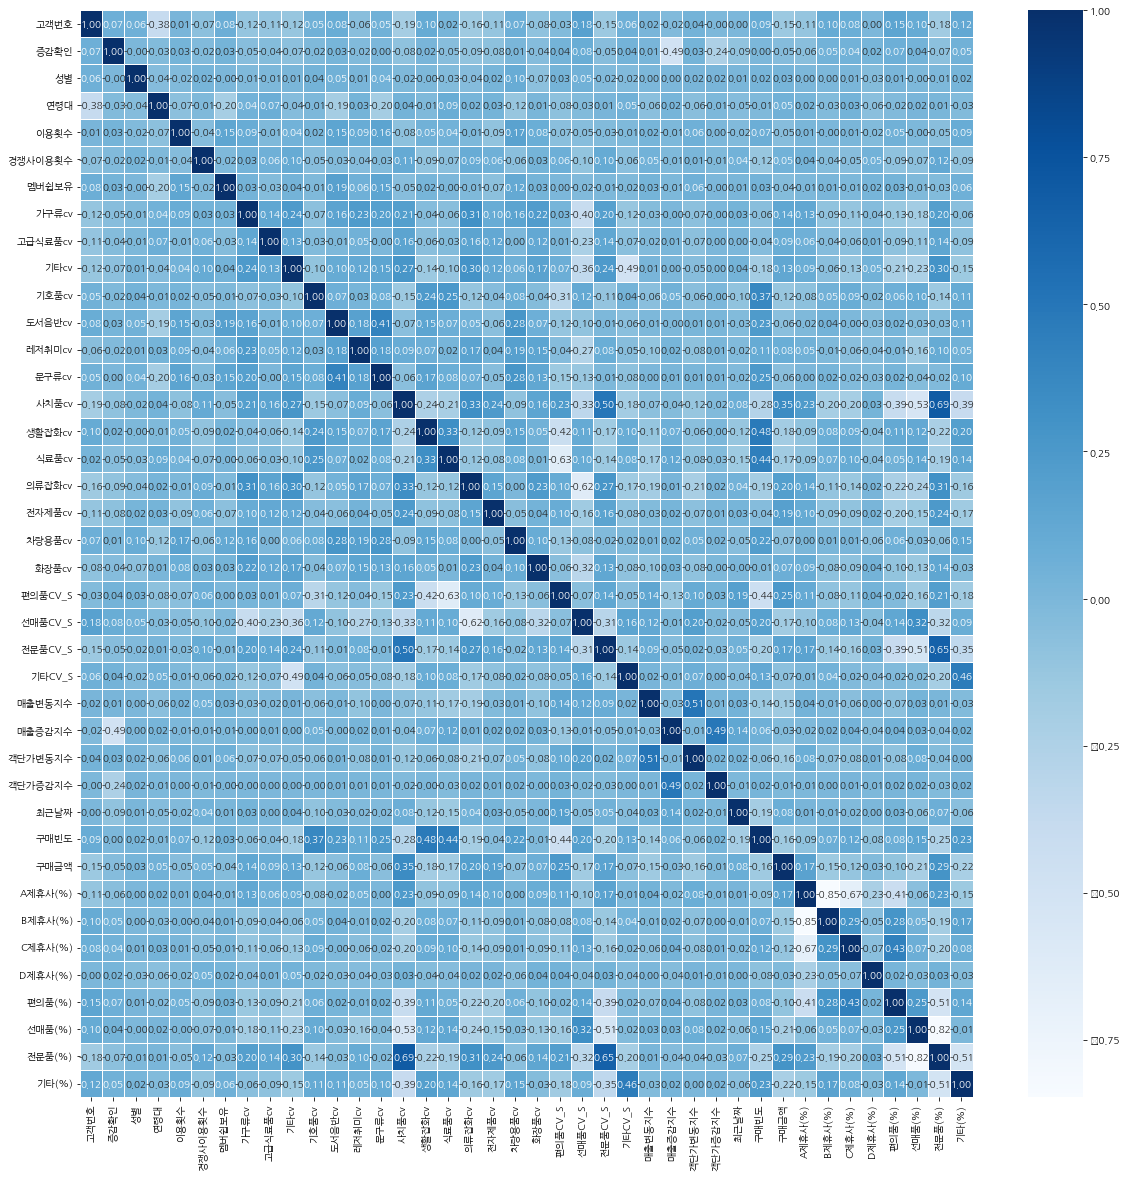

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data =df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [167]:
cor=df.corr()['증감확인'].abs()
cor.sort_values(ascending=False)

증감확인       1.000000
매출증감지수     0.492831
객단가증감지수    0.239869
의류잡화cv     0.094889
최근날짜       0.092873
선매품CV_S    0.084831
사치품cv      0.083028
전자제품cv     0.078987
기타cv       0.073679
전문품(%)     0.072253
편의품(%)     0.068691
고객번호       0.067308
A제휴사(%)    0.059506
전문품CV_S    0.052576
가구류cv      0.052480
기타(%)      0.050407
식료품cv      0.049158
B제휴사(%)    0.046808
구매금액       0.045087
화장품cv      0.044362
C제휴사(%)    0.041702
선매품(%)     0.040298
기타CV_S     0.039731
편의품CV_S    0.038222
고급식료품cv    0.038045
이용횟수       0.032086
연령대        0.030329
멤버쉽보유      0.029322
객단가변동지수    0.026944
도서음반cv     0.025951
레저취미cv     0.023973
경쟁사이용횟수    0.023891
D제휴사(%)    0.019244
생활잡화cv     0.017533
기호품cv      0.016233
매출변동지수     0.013395
차량용품cv     0.007308
구매빈도       0.004010
문구류cv      0.002749
성별         0.001710
Name: 증감확인, dtype: float64

In [218]:
dfr = pd.read_csv('C:/1차data/1-8기최종.csv', encoding="cp949",index_col=0)
dfr

,고객번호,분기증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,총구매금액,구매빈도,최근구매일,...,문구류CV_S,가구류CV_S,레저취미CV_S,전자제품CV_S,도서음반CV_S,차량용품CV_S,분기증감율,분기변동율,객단가변동률,객단가증감률
0,1,0,2.156039,1.998229,3.784157,-0.652472,-0.424659,0.769445,-0.486475,1.167623,...,-1.323632,0.736138,0.279975,0.588740,-0.624613,-0.783590,0.438791,-1.388013,0.075893,-1
1,2,0,2.156039,1.998229,1.828781,-0.652472,-0.424659,1.032366,-0.460644,-0.267878,...,-1.323632,-0.123062,-1.159604,-0.158214,-0.624613,-0.783590,0.000000,-0.690965,0.705120,-1
2,3,0,2.156039,1.998229,-0.405935,-0.652472,-0.424659,-0.501822,-0.315702,1.167623,...,-1.323632,-1.625508,-1.815644,1.170227,-0.624613,-0.783590,0.000000,-1.620363,-1.497173,0
3,4,0,-0.463814,1.998229,0.432083,-0.652472,-0.424659,-0.286751,-0.710346,-0.472949,...,-1.323632,0.088640,0.268642,-1.264607,-0.624613,-0.783590,-0.877582,0.703133,0.075893,-1
4,6,1,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,-0.166226,0.080377,-0.472949,...,1.633736,0.731873,1.163341,-1.264607,-0.624613,-0.783590,-0.877582,-1.155664,-0.238720,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,-0.478128,-0.838067,-0.062806,...,0.585925,-1.625508,1.588049,-1.264607,-0.624613,-0.783590,0.000000,-1.155664,0.705120,-1
18862,19334,0,2.156039,-1.108456,7.974248,1.068660,-0.424659,-0.357708,0.858184,5.884266,...,-0.084726,0.181109,-0.557044,1.170227,0.637271,1.621021,0.438791,0.935482,1.334347,-3
18863,19335,1,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,-0.288700,0.466410,-0.472949,...,-0.945261,-0.684492,-0.032609,-1.264607,0.242607,0.707541,-0.877582,1.167832,0.075893,1
18864,19336,1,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,-0.074066,-1.333165,0.552408,...,-1.323632,1.303824,-1.815644,-1.264607,-0.624613,-0.783590,-3.510330,0.703133,0.075893,-1


0        0.752818
1       -0.454994
2       -1.308038
3        0.263729
4        2.969483
           ...   
18873    0.422813
18874   -0.153848
18875   -0.486941
18876    0.514047
18877   -1.308038
Name: 기타cv, Length: 18878, dtype: float64

In [215]:
# X=df.drop(['고객번호','증감확인'],axis=1)

# y=df[['증감확인']]
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X

,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유,가구류cv,고급식료품cv,기타cv,기호품cv,도서음반cv,...,구매빈도,구매금액,A제휴사(%),B제휴사(%),C제휴사(%),D제휴사(%),편의품(%),선매품(%),전문품(%),기타(%)
0,2.154912,1.998566,-0.423501,3.785326,-0.703766,0.002439,0.469652,0.752818,-0.572023,-0.539541,...,-0.358051,0.751249,0.390612,-0.420830,-0.004591,-0.285059,-0.637370,-0.815035,1.182401,-0.830928
1,2.154912,1.998566,-0.423501,1.829441,-0.703766,0.188818,-0.063812,-0.454994,-0.615197,-0.539541,...,-0.416684,1.016416,0.167687,-0.303073,-0.704472,1.315183,-0.521035,-0.557374,0.792623,-0.491442
2,2.154912,1.998566,-0.423501,-0.405857,-0.703766,-1.337367,-0.974824,-1.308038,2.049097,-0.539541,...,-0.269264,-0.500063,0.813860,-0.720745,-0.435429,-0.285059,-0.458670,1.828343,-0.799093,-0.988326
3,-0.464056,1.998566,-0.423501,0.432380,-0.703766,0.159897,0.299710,0.263729,-0.256348,-0.539541,...,-0.694773,-0.287919,-0.529452,0.484433,0.550137,-0.285059,-0.029309,1.144128,-0.799093,-0.134056
4,-0.464056,1.998566,-0.423501,-0.405857,-0.703766,-0.032283,0.365633,2.969483,-0.794449,-0.539541,...,0.044005,-0.167647,-0.260879,-0.328832,1.215811,-0.285059,-0.392706,0.040430,0.295754,-0.471690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,-0.464056,-2.144283,-0.085040,-0.405857,1.420926,-1.337367,0.638489,0.422813,-0.236681,-0.539541,...,-0.718227,-0.475697,-2.093917,-0.058970,-0.058214,7.319088,0.963737,0.242709,-0.799093,0.771446
18874,2.154912,-1.108571,-0.423501,7.976510,1.420926,0.003426,0.946073,-0.153848,-0.663487,2.361546,...,1.280328,-0.357682,-3.293192,3.374408,1.959146,-0.285059,1.231188,0.272560,-0.799093,0.586889
18875,-0.464056,-1.108571,-0.423501,-0.405857,1.420926,2.159328,0.420607,-0.486941,0.035026,2.683951,...,0.526473,-0.287657,0.709267,-0.577228,-0.433580,-0.285059,0.920561,0.084813,-0.799093,1.041800
18876,-0.464056,-1.108571,-0.423501,-0.405857,-0.703766,-0.265549,-0.974824,0.514047,-1.012075,-0.539541,...,-1.309585,-0.077650,0.549718,-0.991833,-0.704472,1.706254,0.205760,-0.748656,0.865613,-0.715503


# 결정트리

In [169]:
# dt_clf = DecisionTreeClassifier(random_state=156)
# dt_clf.fit(X_train,y_train)
# pred = dt_clf.predict(X_test)
# accuracy = accuracy_score(y_test, pred)
# print('결정트리 예측 정확도: {0:.4f}'.format(accuracy),'\n')


# params = {'max_depth':[2,4,6,8]}
# grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=3,verbose=1)
# grid_cv.fit(X_train,y_train)
# print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
# print('GridSearchCV 최적 하이퍼파라미터:',grid_cv.best_params_)

In [170]:
# feature_series = pd.Series(data=dt_clf.feature_importances_, index=X.columns )
# feature_series = feature_series.sort_values(ascending=False)
# fig, ax = plt.subplots(figsize=(10, 12))
# sns.barplot(x= feature_series, y=feature_series.index)


# 랜덤포레스트

In [206]:
rf_clf = RandomForestClassifier(random_state=156, n_jobs=-1,max_depth= 10, min_samples_leaf = 8, min_samples_split = 20, n_estimators = 100)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy),'\n')




# params = {
#     'n_estimators':[50,100],
#     'max_depth' : [6,8,10,12],
#    'min_samples_leaf' : [8,12,18],
#     'min_samples_split' : [8,16,20]
# }
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
# grid_cv.fit(X_train,y_train)

# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

랜덤포레스트 정확도: 0.7458 



In [191]:
print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

0.7888359157727454
0.7457627118644068


<AxesSubplot:>

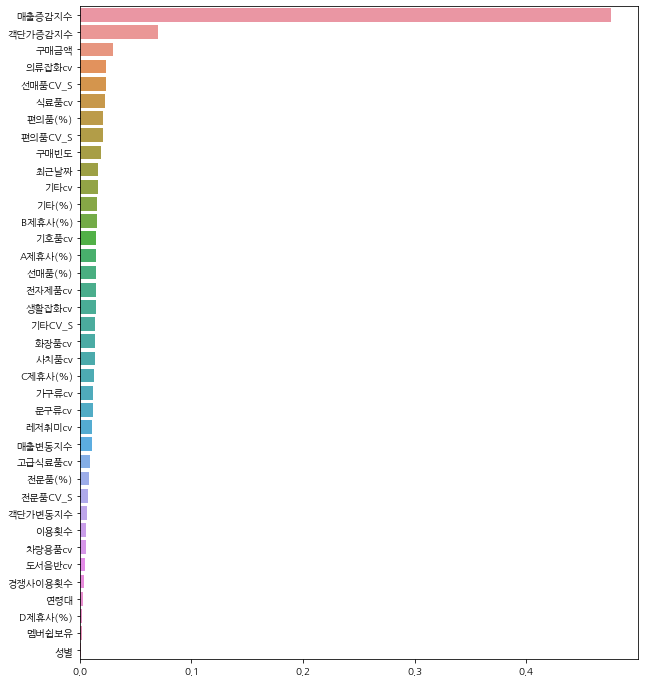

In [209]:
feature_series = pd.Series(data=rf_clf.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 12))
sns.barplot(x= feature_series, y=feature_series.index)


# XGBoost

In [193]:
evals = [(X_test,y_test)]
xgb = XGBClassifier(n_estimators = 100, random_state = 156,verbose=False,colsample_bytree= 0.75, max_depth= 5, min_child_weight= 1)
xgb.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss')
pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred)

# params = {'max_depth':[5,7]
#     , 'min_child_weight':[1,3]
#     , 'colsample_bytree':[0.5,0.75]}

# gridcv = GridSearchCV(xgb, param_grid = params, cv = 3, verbose=False)
# gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
#           eval_set = [(X_train, y_train), (X_test, y_test)])



[20:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.61500
[1]	validation_0-logloss:0.57365
[2]	validation_0-logloss:0.54860
[3]	validation_0-logloss:0.53407
[4]	validation_0-logloss:0.52493
[5]	validation_0-logloss:0.51978
[6]	validation_0-logloss:0.51914
[7]	validation_0-logloss:0.51633
[8]	validation_0-logloss:0.51671
[9]	validation_0-logloss:0.51501
[10]	validation_0-logloss:0.51481
[11]	validation_0-logloss:0.51420
[12]	validation_0-logloss:0.51347
[13]	validation_0-logloss:0.51309
[14]	validation_0-logloss:0.51280
[15]	validation_0-logloss:0.51244
[16]	validation_0-logloss:0.51225
[17]	validation_

In [174]:
print('XGBoost 정확도: {0:.4f}'.format(accuracy),'\n')
print('최적 하이퍼 파라미터:\n', gridcv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))


XGBoost 정확도: 0.7410 

최적 하이퍼 파라미터:
 {'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 1}
최고 예측 정확도: 0.7450


In [194]:
print(accuracy_score(y_train,xgb.predict(X_train)))
print(accuracy_score(y_test,xgb.predict(X_test)))

0.7699642431466031
0.7452330508474576


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

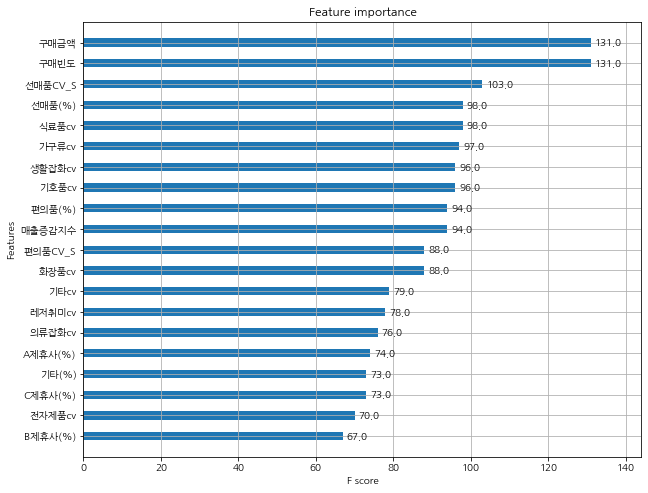

In [213]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb, ax=ax , max_num_features=20,height=0.4)

# LightGBM

In [200]:
lgbm = LGBMClassifier(n_estimators=400, max_depth=128, min_child_samples= 60, subsample= 0.8)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals)
pred = lgbm.predict(X_test,verbose=False)
accuracy = accuracy_score(y_test,pred)



params = {
    'max_depth':[128,160],
    'min_child_samples':[60,100],
    'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm, param_grid = params, cv = 3, verbose=False)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc',
          eval_set = [(X_train, y_train), (X_test,y_test)])

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')




[1]	valid_0's binary_logloss: 0.658893
[2]	valid_0's binary_logloss: 0.634836
[3]	valid_0's binary_logloss: 0.615446
[4]	valid_0's binary_logloss: 0.599055
[5]	valid_0's binary_logloss: 0.585592
[6]	valid_0's binary_logloss: 0.574063
[7]	valid_0's binary_logloss: 0.56441
[8]	valid_0's binary_logloss: 0.55635
[9]	valid_0's binary_logloss: 0.549493
[10]	valid_0's binary_logloss: 0.543445
[11]	valid_0's binary_logloss: 0.538713
[12]	valid_0's binary_logloss: 0.534741
[13]	valid_0's binary_logloss: 0.531217
[14]	valid_0's binary_logloss: 0.528048
[15]	valid_0's binary_logloss: 0.525764
[16]	valid_0's binary_logloss: 0.523462
[17]	valid_0's binary_logloss: 0.52158
[18]	valid_0's binary_logloss: 0.520383
[19]	valid_0's binary_logloss: 0.5192
[20]	valid_0's binary_logloss: 0.517875
[21]	valid_0's binary_logloss: 0.516727
[22]	valid_0's binary_logloss: 0.515845
[23]	valid_0's binary_logloss: 0.514839
[24]	valid_0's binary_logloss: 0.51406
[25]	valid_0's binary_logloss: 0.513845
[26]	valid_0's 

LightGBMError: Parameter verbosity should be of type int, got "False"

In [177]:
print('LGBM 정확도: {0:.4f}'.format(accuracy),'\n')
print('최적 하이퍼 파라미터:\n', gridcv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

LGBM 정확도: 0.7421 

최적 하이퍼 파라미터:
 {'max_depth': 128, 'min_child_samples': 60, 'subsample': 0.8}
최고 예측 정확도: 0.7443


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

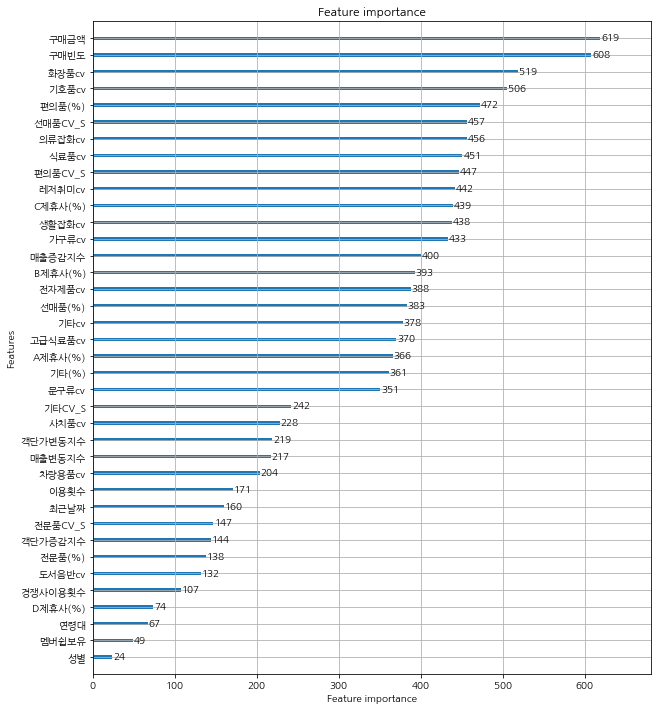

In [212]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

In [201]:
print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9739107402992981
0.7319915254237288


# 로지스틱 회귀

In [203]:
lr_clf = LogisticRegression(C= 5, penalty='l2')
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test,lr_preds)
roc_auc = roc_auc_score(y_test,pred_proba)
print(f' 로지스틱회귀 정확도: {accuracy:.4f}')
print(f'roc_auc: {roc_auc:.4f}','\n')


params = {'penalty':['l2','l1'],
         'C':[0.01,0.1,1,5,10]}

grid_clf = GridSearchCV(lr_clf,param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(X_train, y_train)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}')
print(f'최적 평균 정확도 : {grid_clf.best_score_: .4f}')


 로지스틱회귀 정확도: 0.7450
roc_auc: 0.8172 

최적 하이퍼 파라미터 : {'C': 5, 'penalty': 'l2'}
최적 평균 정확도 :  0.7393


<AxesSubplot:>

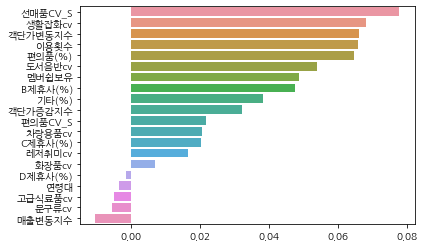

In [211]:
coef = pd.Series(lr_clf.coef_ [0], index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)


In [205]:
print(accuracy_score(y_train,lr_clf.predict(X_train)))
print(accuracy_score(y_test,lr_clf.predict(X_test)))

0.7425506555423123
0.744968220338983


# 혼돈행렬

In [207]:
def est(y_test,pred,pred_proba):
    con=confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    rec=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc=roc_auc_score(y_test,pred_proba)
    print('오차행렬\n',con.round(3))
    print('정확도 :',acc.round(3))
    print('정밀도 :',pre.round(3))
    print('재현율 :',rec.round(3))
    print('f1점수:',f1.round(3))
    print('roc_auc :',roc.round(3))
    print()
    print()
    


rf_clf = RandomForestClassifier(n_jobs=-1,max_depth= 10, min_samples_leaf = 8, min_samples_split = 20, n_estimators = 100)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:,1]
print('랜덤포레스트')
est(y_test,pred,pred_proba)

                                                                  

lr_clf = LogisticRegression(C= 5, penalty='l2')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
print('로지스틱회귀')
est(y_test,pred,pred_proba)


lgbm_wrapper = LGBMClassifier(n_estimators=400, max_depth=128, min_child_samples= 60, subsample= 0.8)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_set=evals, verbose=False)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
print('LGBM')
est(y_test,pred,pred_proba)


evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 300, random_state = 156,verbose=False,colsample_bytree= 0.75, max_depth= 5, min_child_weight= 1)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
print('XGB')
est(y_test,pred,pred_proba)

랜덤포레스트
오차행렬
 [[1256  439]
 [ 516 1565]]
정확도 : 0.747
정밀도 : 0.781
재현율 : 0.752
f1점수: 0.766
roc_auc : 0.819


로지스틱회귀
오차행렬
 [[1202  493]
 [ 470 1611]]
정확도 : 0.745
정밀도 : 0.766
재현율 : 0.774
f1점수: 0.77
roc_auc : 0.817


LGBM
오차행렬
 [[1185  510]
 [ 502 1579]]
정확도 : 0.732
정밀도 : 0.756
재현율 : 0.759
f1점수: 0.757
roc_auc : 0.812


[20:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGB
오차행렬
 [[1254  441]
 [ 521 1560]]
정확도 : 0.745
정밀도 : 0.78
재현율 : 0.75
f1점수: 0.764
roc_auc : 0.823




# importance, 군집화

In [181]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [182]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

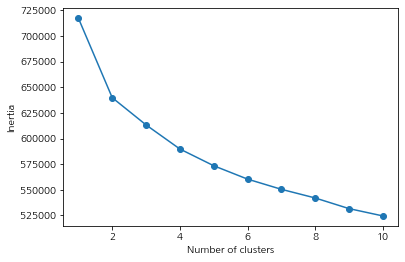

In [184]:
inertia = []
for i in range(1, 11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(X)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

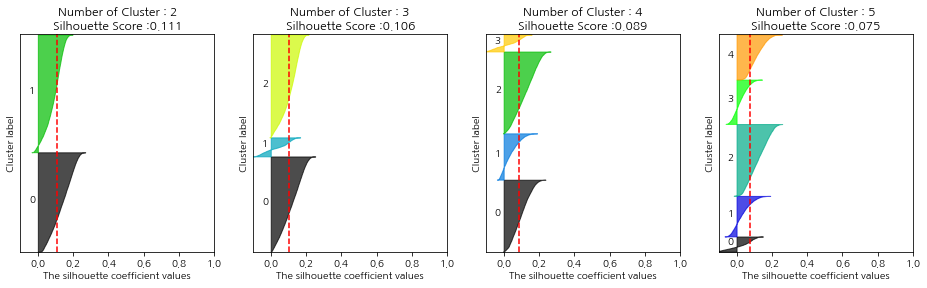

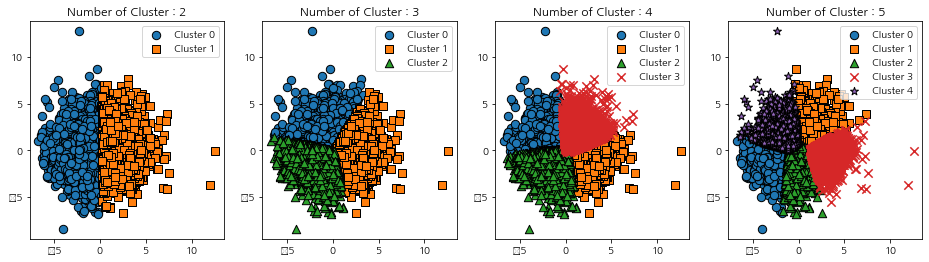

In [185]:
visualize_silhouette([2,3,4,5], X)
visualize_kmeans_plot_multi([2,3,4,5],X)